In [23]:
import pandas as pd
import common

# Plan:

1. add all stocks data together into ine dataframe
2. save into feather
3. calculate correlations, rolling correlations, weighted correlations, and try to cluster the stocks into groups. 



In [35]:

raw = []
for stock in common.get_all_stocks():
    df = common.StockData(stock).training
    relevant_df = df[['datetime', 'close']]
    relevant_df = relevant_df.set_index('datetime', drop=True)
    relevant_df.columns = [stock]
    raw.append(relevant_df)


In [36]:
from functools import reduce

merged = reduce(lambda  left,right: pd.merge(left,right, how='outer', left_index=True, right_index=True), raw)
merged

,CRM,GM,PFE,COST,D,LRCX,YUM,USB,CAH,EFA,...,BAC,TLT,DUK,BDX,ILMN,EWZ,TSM,PGR,MAR,T
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-26 16:30:00,NaN,NaN,31.450,NaN,NaN,NaN,NaN,NaN,NaN,60.220,...,23.360,118.910,NaN,NaN,NaN,37.430,NaN,NaN,NaN,41.220
2017-01-26 16:31:00,NaN,NaN,31.380,NaN,NaN,NaN,NaN,NaN,NaN,60.220,...,23.390,118.910,NaN,NaN,NaN,37.380,NaN,NaN,NaN,41.300
2017-01-26 16:32:00,NaN,NaN,31.330,NaN,NaN,NaN,NaN,NaN,NaN,60.220,...,23.400,118.870,NaN,NaN,NaN,37.380,NaN,NaN,NaN,41.290
2017-01-26 16:33:00,NaN,NaN,31.310,NaN,NaN,NaN,NaN,NaN,NaN,60.230,...,23.340,118.802,NaN,NaN,NaN,37.390,NaN,NaN,NaN,41.330
2017-01-26 16:34:00,NaN,NaN,31.330,NaN,NaN,NaN,NaN,NaN,NaN,60.220,...,23.403,118.850,NaN,NaN,NaN,37.400,NaN,NaN,NaN,41.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28 22:55:00,163.408,39.408,43.208,218.510,74.238,175.738,94.477,51.588,54.238,64.228,...,29.118,120.028,89.727,248.888,312.488,43.028,39.052,72.958,125.607,31.078
2019-02-28 22:56:00,163.518,39.467,43.177,218.547,74.279,175.967,94.477,51.588,54.267,64.217,...,29.067,120.018,89.778,248.818,312.538,43.048,39.078,72.947,125.698,31.128
2019-02-28 22:57:00,163.399,39.438,43.108,218.418,74.248,175.797,94.478,51.577,54.207,64.188,...,29.028,120.018,89.701,248.717,312.377,43.050,39.038,72.907,125.388,31.118


In [37]:
merged.to_csv('all_closeing_prices.csv')

In [24]:
merged = pd.read_csv('all_closeing_prices.csv')

In [3]:
pearson_corr = merged.corr(method='pearson')
pearson_corr.to_csv('pearson_corr.csv')
pearson_corr





,CRM,GM,PFE,COST,D,LRCX,YUM,USB,CAH,EFA,...,BAC,TLT,DUK,BDX,ILMN,EWZ,TSM,PGR,MAR,T
CRM,1.000000,-0.546943,0.814245,0.821291,0.160412,-0.520032,0.514123,-0.291473,-0.604838,-0.336522,...,0.520797,-0.662762,-0.213150,0.777465,0.803850,-0.134454,-0.146978,0.719364,-0.413655,-0.795904
GM,-0.546943,1.000000,-0.680464,-0.605311,-0.283313,0.650048,-0.453573,0.432914,0.360075,0.632095,...,0.298984,0.627407,-0.096422,-0.119976,-0.458179,0.195936,0.101787,-0.383525,0.552889,0.558456
PFE,0.814245,-0.680464,1.000000,0.811504,0.539574,-0.816298,0.767535,-0.182294,-0.542986,-0.338390,...,0.354471,-0.550463,0.161879,0.532399,0.802075,0.006845,-0.302453,0.698135,-0.723801,-0.763416
COST,0.821291,-0.605311,0.811504,1.000000,0.315785,-0.672933,0.397439,0.005186,-0.533555,-0.491408,...,-0.045542,-0.609374,0.120990,0.822761,0.928909,-0.513622,-0.124991,0.749765,-0.400138,-0.551297
D,0.160412,-0.283313,0.539574,0.315785,1.000000,-0.464828,0.266977,0.268289,0.055852,-0.466976,...,-0.198130,-0.188316,0.560247,0.217502,0.255925,0.184214,0.034568,0.147670,-0.395765,-0.089361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EWZ,-0.134454,0.195936,0.006845,-0.513622,0.184214,0.310165,0.200019,0.103343,0.552870,0.219778,...,0.247531,0.008768,-0.001261,-0.543484,-0.645082,1.000000,0.078632,-0.230370,0.166820,0.036946
TSM,-0.146978,0.101787,-0.302453,-0.124991,0.034568,0.533531,-0.319212,0.643157,0.639242,0.664388,...,0.776447,-0.058188,-0.533886,0.135070,-0.123738,0.078632,1.000000,-0.010891,0.646335,0.786887
PGR,0.719364,-0.383525,0.698135,0.749765,0.147670,-0.334106,0.644592,0.200433,-0.294589,-0.312077,...,-0.080768,-0.404818,0.458739,0.628921,0.687457,-0.230370,-0.010891,1.000000,-0.341412,-0.336286
MAR,-0.413655,0.552889,-0.723801,-0.400138,-0.395765,0.761651,-0.673168,0.564260,0.711619,0.925249,...,0.797923,0.147710,-0.710098,-0.135551,-0.513737,0.166820,0.646335,-0.341412,1.000000,0.742155


In [4]:
spearman_corr = merged.corr(method='spearman')
spearman_corr.to_csv('spearman_corr.csv')


In [5]:
kendall_corr = merged.corr(method='kendall')
kendall_corr.to_csv('kendall_corr.csv')



In [38]:

def get_most_correlated(correlation_matrix, stock, n):
    return correlation_matrix[stock].abs().sort_values(ascending=False).head(n + 1)[1:]


most_pearson_correlated = get_most_correlated(pearson_corr, "V", 20)
most_kendall_correlated = get_most_correlated(kendall_corr, "V", 20)
most_spearman_correlated = get_most_correlated(spearman_corr, "V", 20)

pd.concat(
    [most_pearson_correlated, most_spearman_correlated, most_kendall_correlated], 
    axis=1).dropna().mean(axis=1).sort_values(ascending=False).head(10)

MSFT    0.971232
MA      0.964069
CRM     0.941606
ISRG    0.941204
ADBE    0.937571
AMZN    0.922269
INTU    0.904402
NKE     0.902925
QQQ     0.901141
CSX     0.900169
dtype: float64

In [6]:
from collections import defaultdict

wanted_stocks = ['V','AAPL', 'GOOGL', 'JNJ', 'AMZN', 'XOM', 'JPM', 'KO', 'SPY', 'MSFT']

stocks_corelations = defaultdict(list)

for stock in wanted_stocks:
    for method in ['spearman', 'kendall', 'pearson']:
        print(f"calculating {method} on {stock}")
        corr = merged.corrwith(merged[stock].shift(-10), method=method)
        most_correlated = corr.abs().sort_values(ascending=False).head(41)[1:]
        stocks_corelations[stock].append(most_correlated)
    print(f"stock {stock} done")

stocks_corelations

calculating spearman on V
calculating kendall on V
calculating pearson on V
stock V done
calculating spearman on AAPL
calculating kendall on AAPL
calculating pearson on AAPL
stock AAPL done
calculating spearman on GOOGL
calculating kendall on GOOGL
calculating pearson on GOOGL
stock GOOGL done
calculating spearman on JNJ
calculating kendall on JNJ
calculating pearson on JNJ
stock JNJ done
calculating spearman on AMZN
calculating kendall on AMZN
calculating pearson on AMZN
stock AMZN done
calculating spearman on XOM
calculating kendall on XOM
calculating pearson on XOM
stock XOM done
calculating spearman on JPM
calculating kendall on JPM
calculating pearson on JPM
stock JPM done
calculating spearman on KO
calculating kendall on KO
calculating pearson on KO
stock KO done
calculating spearman on SPY
calculating kendall on SPY
calculating pearson on SPY
stock SPY done
calculating spearman on MSFT
calculating kendall on MSFT
calculating pearson on MSFT
stock MSFT done


defaultdict(list,
            {'V': [MSFT     0.992068
              MA       0.987252
              CRM      0.976871
              ADBE     0.975826
              ISRG     0.972990
              AMZN     0.963031
              INTU     0.951733
              CSX      0.951137
              NKE      0.950714
              ADP      0.948767
              NSC      0.948187
              QQQ      0.937810
              COST     0.935591
              ABT      0.933418
              NFLX     0.926374
              BA       0.924356
              DG       0.917141
              UNH      0.915560
              AMD      0.914315
              IVW      0.914150
              HUM      0.906509
              GE       0.904896
              UNP      0.900989
              CSCO     0.899962
              AZN      0.891882
              ILMN     0.889572
              PFE      0.886900
              GOOG     0.886295
              GOOGL    0.884288
              CME      0.882793
              ROS

In [21]:
best_correlations = {}

for stock, correlations in stocks_corelations.items():
    best_correlations[stock] = pd.concat(correlations, axis=1).dropna().mean(axis=1).sort_values(ascending=False).head(10).to_dict()
    
best_correlations

{'V': {'MSFT': 0.9709056297654026,
  'MA': 0.9635831029597332,
  'CRM': 0.941396251529038,
  'ISRG': 0.9404997598081839,
  'ADBE': 0.9373480929212296,
  'AMZN': 0.9220724353820309,
  'INTU': 0.9036869571359176,
  'NKE': 0.9026912760816282,
  'QQQ': 0.9008462915863973,
  'CSX': 0.8997622972989844},
 'AAPL': {'QQQ': 0.8667238384904389,
  'SPY': 0.8444577272943015,
  'IVW': 0.8135785682590262,
  'XLK': 0.8042815736490291,
  'IJR': 0.7997115682779921,
  'AMZN': 0.7994459898593429,
  'IWM': 0.7952594759990429,
  'GOOGL': 0.7902781413608225,
  'GOOG': 0.7895205277640825,
  'NVDA': 0.789285102238213},
 'GOOGL': {'GOOG': 0.9892697648586823,
  'QQQ': 0.9179607982418331,
  'SPY': 0.8963276649583296,
  'HD': 0.8857848388831608,
  'IVW': 0.8804168385629678,
  'AMZN': 0.8606211057869709,
  'IWF': 0.8360335046521586,
  'NFLX': 0.8268237840246754,
  'V': 0.8252933473553336,
  'IJR': 0.8173494236880684},
 'JNJ': {'WBA': 0.7837874003922424,
  'PEP': 0.7198141134416659,
  'WMT': 0.7161178764577795,
  'C

In [22]:
import json 
with open('most_correlated_stocks.json', 'w') as output_file:
    json.dump(best_correlations, output_file)

In [ ]:
from tslearn.generators import random_walks
from tslearn.cluster_centers_ import 
X = random_walks(n_ts=50, sz=32, d=1)
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
                      random_state=0).fit(X)
km.cluster_centers_.shape


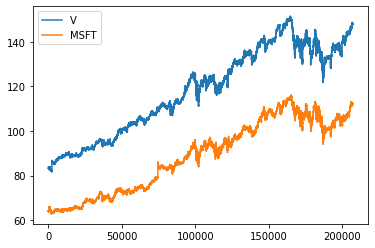

In [39]:
merged[['V', 'MSFT']].plot()

In [ ]:
all_snp_stocks = [i.stem for i in Path('data/relevant/snp500_from_iex').iterdir()]
first_ticker = all_snp_stocks[0]
main_df = get_relevant_data(first_ticker)
main_df = preprocess_data(main_df)
main_df.rename(columns={'close': first_ticker}, inplace=True)


for ticker in all_snp_stocks[1:]:
    df = get_relevant_data(ticker)
    if df is None:
        continue
    df = preprocess_data(df)
    df.rename(columns={'close': ticker}, inplace=True)
    main_df = main_df.merge(df, on='datetime', how="outer", copy=False)
    print(f"ticker {ticker} added")
    
main_df

In [ ]:
kendall_correlations = main_df.corr(method='kendall')
kendall_correlations

In [ ]:
kendall_correlations.to_csv("kendall_correlations_of_all_stocks.csv")

In [ ]:
kendall_correlations = pd.read_csv("kendall_correlations_of_all_stocks.csv")
kendall_correlations = kendall_correlations.set_index("Unnamed: 0", drop=True)
kendall_correlations.index = kendall_correlations.index.rename("")
kendall_correlations

In [ ]:
mask = np.zeros_like(kendall_correlations)
mask[np.triu_indices_from(mask)] = True

# generate plot
seaborn.heatmap(kendall_correlations, cmap='RdYlGn', vmax=1.0,
                vmin=-1.0, mask=mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px

fig = px.imshow(kendall_correlations.values)
fig.show()

In [ ]:
kendall_correlations.abs().unstack().sort_values(ascending = False)

# kendall_correlations.corr().unstack().sort_values().drop_duplicates()


In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


get_top_abs_correlations(kendall_correlations, 50)

In [ ]:
main_df

In [ ]:
goog_data = get_relevant_data('GOOG')
goog_data = preprocess_data(goog_data)
goog_data.plot()

googl_data = get_relevant_data('GOOGL')
googl_data = preprocess_data(googl_data)
googl_data.plot()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=goog_data['close'], x=goog_data.index,
                    mode='lines',
                    name='goog'))
fig.add_trace(go.Scatter(y=googl_data['close'], x=googl_data.index,
                    mode='lines',
                    name='googl'))

fig.show()

In [ ]:
def drow_stocks(*tickers):
    fig = go.Figure()
    for ticker in tickers:
        data = get_relevant_data(ticker)
        data = preprocess_data(data)
        fig.add_trace(go.Scatter(y=data['close'], x=data.index,
                    mode='lines',
                    name=ticker))

    fig.show()
    
    
drow_stocks('V', 'MA')

In [ ]:
drow_stocks('GL', 'AMP')

In [ ]:
drow_stocks('DVN', 'EOG')

In [ ]:
drow_stocks('C', 'SWK')